# Simulating brownian motion

In [1]:
!pip install numpy
!pip install matplotlib
!pip install random


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.7 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.

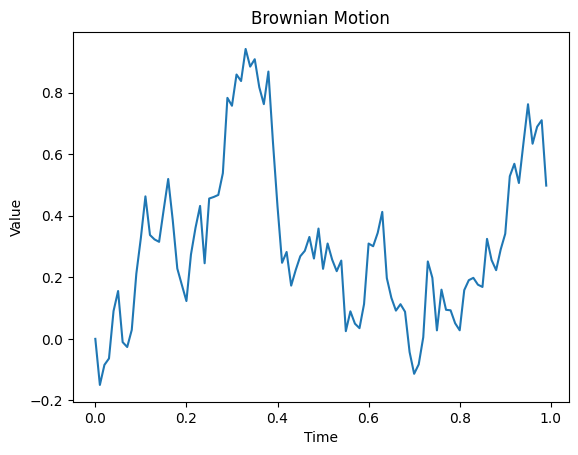

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

delta = 0.01
t = np.arange(0, 1, delta)
B_t = [0]
for _ in range(len(t) - 1):
    B_tNext = B_t[-1] + np.random.normal(0, delta ** (1/2))
    B_t.append(B_tNext)
plt.plot(t, B_t)
plt.title("Brownian Motion")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend
plt.show()

# Ornstein-Uhlenbeck process

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/2029925262.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/2029925262.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


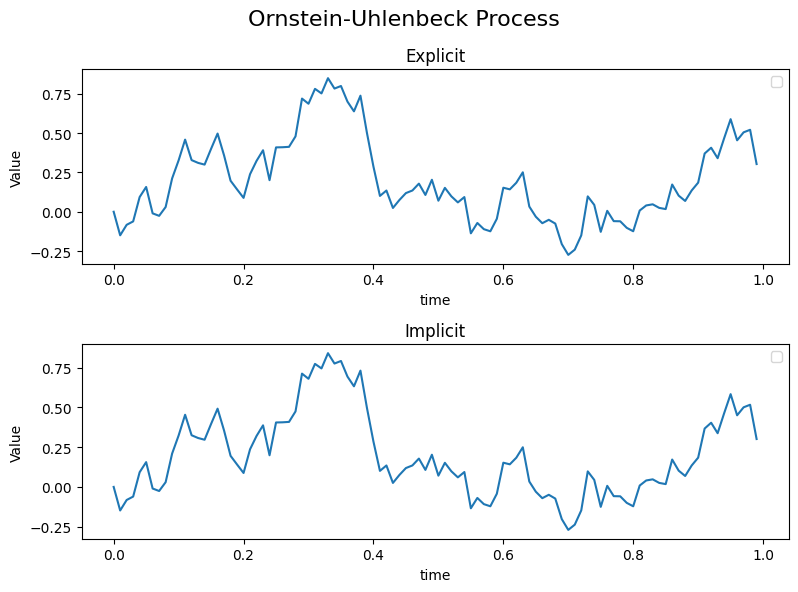

In [ ]:
delta = 0.01
t = np.arange(0, 1, delta)
Y_t_explicit = [0]
Y_t_implicit = [0]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]
    Y_t_explicit.append(Y_t_explicit[i] - Y_t_explicit[i] * delta + dB)
    Y_t_implicit.append((Y_t_implicit[i] + dB)/ (1 + delta))


fig, (plt, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Y_t_explicit)
ax1.set_title('Explicit')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Y_t_implicit)
ax2.set_title('Implicit')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Ornstein-Uhlenbeck Process', fontsize=16)
plt.tight_layout()
plt.show()

# Feller

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/4036794352.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/4036794352.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


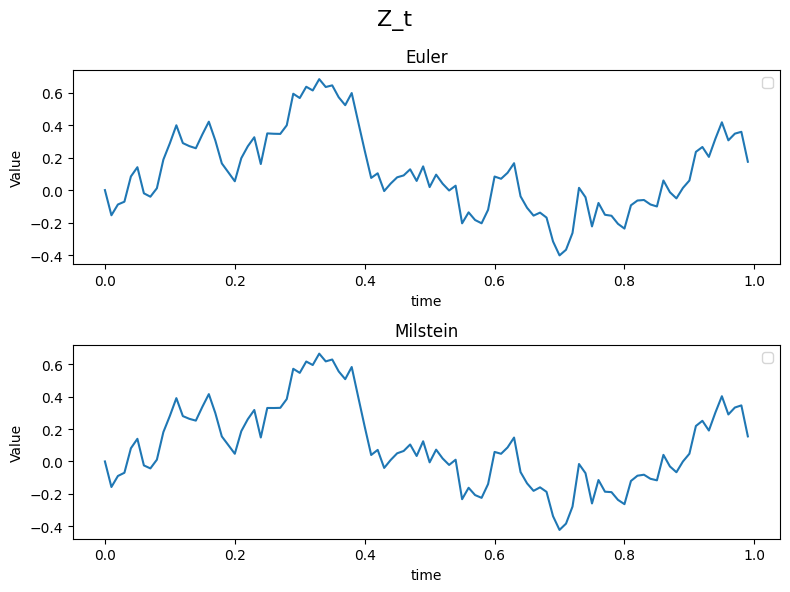

In [49]:
Z_t_euler = [0]
Z_t_mil = [0]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]

    a = np.exp(-Z_t_euler[-1])/2 - 1
    Z_t_euler.append(Z_t_euler[-1] + a * delta + np.exp(-0.5* Z_t_euler[-1]) * dB)

    a = np.exp(-Z_t_mil[-1])/2 - 1
    b = np.exp(-0.5* Z_t_mil[-1])
    Z_t_mil.append(Z_t_mil[-1] + a * delta + b * dB - 0.5 * 0.5 * np.exp(-0.5 * Z_t_mil[-1]) * b * ((dB ** 2) - delta))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Z_t_euler)
ax1.set_title('Euler')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Z_t_mil)
ax2.set_title('Milstein')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Z_t', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3788247221.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3788247221.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


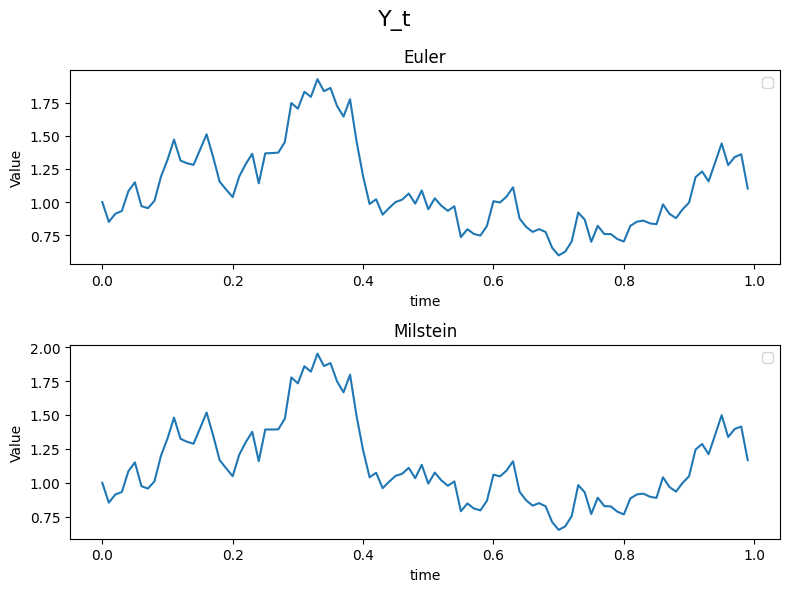

In [50]:
Y_t_euler = [1]
Y_t_mil = [1]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]

    a = 1 - np.exp(Z_t_euler[i])
    Y_t_euler.append(Y_t_euler[-1] + a * delta + (np.exp(0.5 * Z_t_euler[i])) * dB)

    a = 1 - np.exp(Z_t_mil[i])
    b = np.exp(0.5 * Z_t_mil[i])
    Y_t_mil.append(Y_t_mil[-1] + a * delta + b * dB + 0.5 * 1/(2 * (Y_t_mil[i] ** (1/2))) * (Y_t_mil[i] ** (1/2)) * (dB ** 2 - delta))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Y_t_euler)
ax1.set_title('Euler')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Y_t_mil)
ax2.set_title('Milstein')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Y_t', fontsize=16)
plt.tight_layout()
plt.show()

# Geometric Brownian motion

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/1527415140.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/1527415140.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


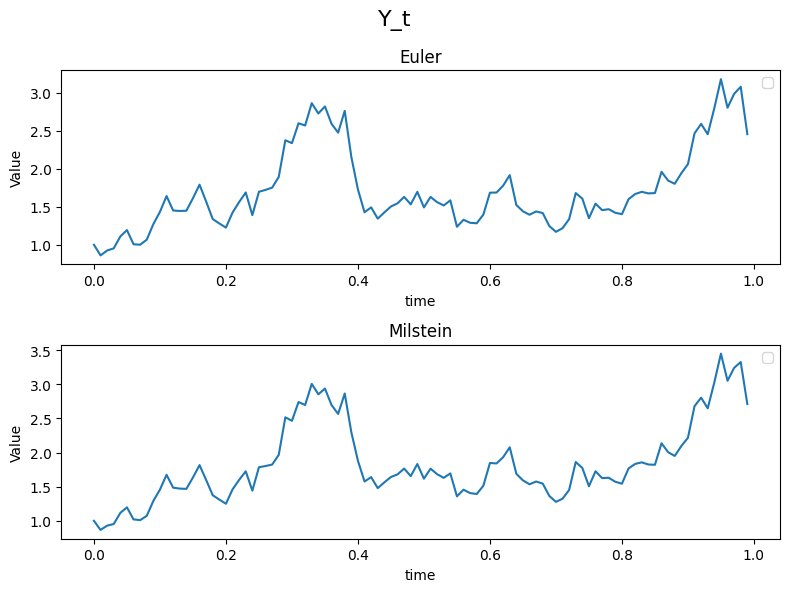

In [51]:
Y_t_euler = [1]
Y_t_mil = [1]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]

    a = Y_t_euler[-1]
    Y_t_euler.append(Y_t_euler[-1] + a * delta + Y_t_euler[-1] * dB)

    a = Y_t_mil[-1]
    b = Y_t_mil[-1]
    Y_t_mil.append(Y_t_mil[-1] + a * delta + b * dB + 0.5 * b * (dB ** 2 - delta))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Y_t_euler)
ax1.set_title('Euler')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Y_t_mil)
ax2.set_title('Milstein')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Y_t', fontsize=16)
plt.tight_layout()
plt.show()

# Brownian Bridge

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/1754050732.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/1754050732.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


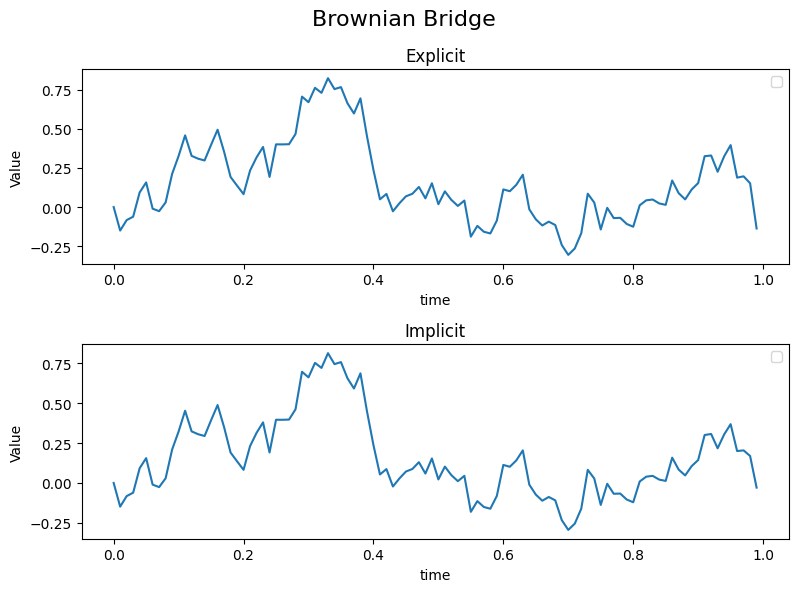

In [55]:
Y_t_explicit = [0]
Y_t_implicit = [0]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]
    Y_t_explicit.append(Y_t_explicit[i] - Y_t_explicit[i]/(1 - i * delta) * delta + dB)
    Y_t_implicit.append((Y_t_implicit[i] + dB)/(1 + delta/(1-(delta * i))))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Y_t_explicit)
ax1.set_title('Explicit')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Y_t_implicit)
ax2.set_title('Implicit')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Brownian Bridge', fontsize=16)
plt.tight_layout()
plt.show()

# Q6: dY_t := Y_t * B_t * dB_t, Y_0 = 1

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/2600025707.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/2600025707.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


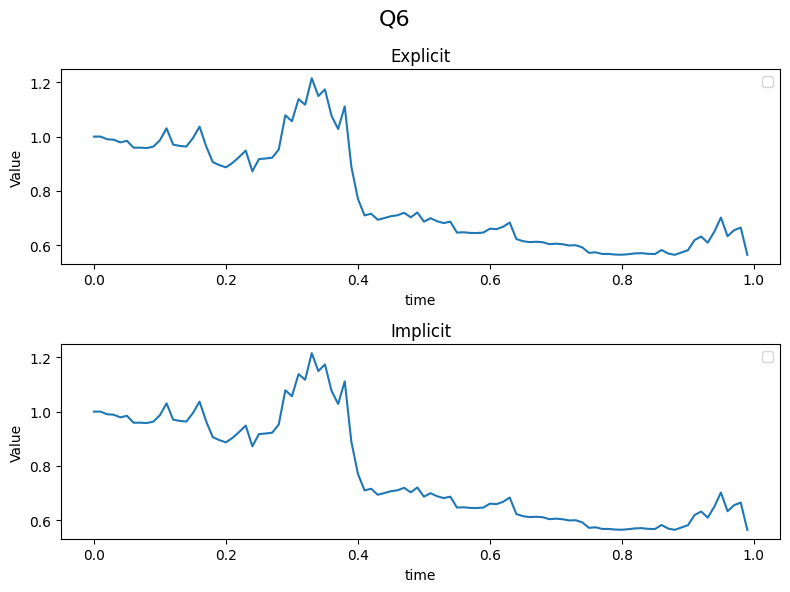

In [57]:
Y_t_explicit = [1]
Y_t_implicit = [1]
for i in range(len(t) - 1):
    dB = B_t[i+1] - B_t[i]
    Y_t_explicit.append(Y_t_explicit[i] + Y_t_explicit[i] * B_t[i] * dB)
    Y_t_implicit.append(Y_t_implicit[i] + Y_t_implicit[i] * B_t[i] * dB)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(t, Y_t_explicit)
ax1.set_title('Explicit')
ax1.set_xlabel('time')
ax1.set_ylabel('Value')
ax1.legend()

ax2.plot(t, Y_t_implicit)
ax2.set_title('Implicit')
ax2.set_xlabel('time')
ax2.set_ylabel('Value')
ax2.legend()

fig.suptitle('Q6', fontsize=16)
plt.tight_layout()
plt.show()

In [73]:
r = 0.05
x_0 = 0.1
theta = 0.1
k = 0.25
b = 0.2
T_values = [1, 10, 100]
n = 1000000

for T in T_values:
    delta = T/200
    t = np.arange(0, T, delta)
    exp_euler = []
    exp_mil = []
    for i in range(n):
        X_t_euler = [x_0]
        X_t_mil = [x_0]
        R_euler = []
        R_mil = []
        while len(X_t_euler) != len(t):
            epsilon = np.random.normal(0,1)
            if X_t_euler[-1] < 0: # ask if it is fine to just drop samples that have the path going negative
                X_t_euler.pop()
            X_t_euler.append(X_t_euler[-1] + k * (theta - X_t_euler[-1]) * delta + b * (X_t_euler[-1] ** (1/2)) * (delta ** (1/2)) * epsilon)
            R_euler.append(r + X_t_euler[-1])
        while len(X_t_mil) != len(t):
            epsilon = np.random.normal(0,1)
            if X_t_mil[-1] < 0:
                X_t_mil.pop()
            X_t_mil.append(X_t_mil[-1] + k * (theta - X_t_mil[-1]) * delta + b * (X_t_mil[-1] ** (1/2)) * (delta ** (1/2)) * epsilon + 1/4 * (b ** 2) * delta * (epsilon ** 2 - 1))
            R_mil.append(r + X_t_mil[-1])
        exp_euler.append(np.exp(-np.sum(R_euler)*delta))
        exp_mil.append(np.exp(-np.sum(R_mil)*delta))
    print(f'B(0,{T}) = {np.mean(exp_euler)}, using Euler\n')
    print(f'B(0,{T}) = {np.mean(exp_mil)}, using Milstein\n')

B(0,1) = 0.8617836528031387, using Euler

B(0,1) = 0.8618003521114955, using Milstein

B(0,10) = 0.25141905010694726, using Euler

B(0,10) = 0.25303328969360284, using Milstein

B(0,100) = 5.514649762775771e-07, using Euler

B(0,100) = 2.3025650483400236e-06, using Milstein



In [ ]:
r = 0.05
x_0 = 0.1
theta = 0.1
k = 0.25
b = 0.2
T_values = [1, 10, 100]
n = 1000
    
for T in T_values:
    delta = T/200
    exp_euler = []
    exp_mil = []
    for i in range(n):
        X_t_euler = [x_0]
        X_t_mil = [x_0]
        Y_t_euler = [np.log(x_0)]
        Y_t_mil = [np.log(x_0)]
        R_euler = []
        R_mil = []
        for _ in range(200):
            epsilon = np.random.normal(0,1)

            a_x = np.exp(-Y_t_euler[-1]) * (k * theta - (b**2)/2) - k
            b_x = b * np.exp(-0.5 * Y_t_euler[-1])
            val1 = Y_t_euler[-1] + a_x * delta + b_x * (delta ** (1/2)) * epsilon
            Y_t_euler.append(val1)

            a_x = np.exp(-Y_t_mil[-1]) * (k * theta - (b**2)/2) - k
            b_x =  b * np.exp(-0.5 * Y_t_mil[-1])
            b_prime = -0.5 * b_x
            val2 = Y_t_mil[-1] + a_x * delta + b_x * (delta ** (1/2)) * epsilon + 0.5 * b_prime * b_x * ((((delta ** (1/2)) * epsilon) ** 2) - delta)
            Y_t_mil.append(val2)


            if Y_t_euler[-1] < 50:
                X_t_euler = np.exp(Y_t_euler[-1])
            else:
                X_t_euler = 1e9 # cap value

            if Y_t_mil[-1] < 50:
                X_t_mil = np.exp(Y_t_mil[-1])
            else:
                X_t_mil = 1e9 # cal value

            R_euler.append(r + X_t_euler)

            R_mil.append(r + X_t_mil)

        exp_euler.append(np.exp(-np.sum(R_euler)*delta))
        exp_mil.append(np.exp(-np.sum(R_mil)*delta))
    print(f'B(0,{T}) = {np.mean(exp_euler)}, using Euler\n')
    print(f'B(0,{T}) = {np.mean(exp_mil)}, using Milstein\n')

B(0,1) = 0.8626763978575481, using Euler

B(0,1) = 0.862691530685634, using Milstein



/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3064538782.py:28: RuntimeWarning: overflow encountered in exp
  a_x = np.exp(-Y_t_mil[-1]) * (k * theta - (b**2)/2) - k
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3064538782.py:29: RuntimeWarning: overflow encountered in exp
  b_x =  b * np.exp(-0.5 * Y_t_mil[-1])
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3064538782.py:31: RuntimeWarning: overflow encountered in scalar multiply
  val2 = Y_t_mil[-1] + a_x * delta + b_x * (delta ** (1/2)) * epsilon + 0.5 * b_prime * b_x * ((((delta ** (1/2)) * epsilon) ** 2) - delta)
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_15205/3064538782.py:31: RuntimeWarning: invalid value encountered in scalar add
  val2 = Y_t_mil[-1] + a_x * delta + b_x * (delta ** (1/2)) * epsilon + 0.5 * b_prime * b_x * ((((delta ** (1/2)) * epsilon) ** 2) - delta)


B(0,10) = 0.22983621915422367, using Euler

B(0,10) = 0.22611794499162463, using Milstein

B(0,100) = 3.200602567782344e-08, using Euler

B(0,100) = 9.637322637663325e-08, using Milstein



In [ ]:
delta = 0.01
t = np.arange(0, 1, delta)
n = 10000
Y_t_final = []
for path in range(n):
    Y_t_explicit = [0]
    for i in range(len(t) - 1):
        dB = np.sqrt(delta) * np.random.normal(0, 1)
        Y_t_explicit.append(Y_t_explicit[i] - Y_t_explicit[i] * delta + dB)
    Y_t_final.append(Y_t_explicit[-1])

Y_t_final = np.sort(Y_t_final)


VaR_5 = np.percentile(Y_t_final, 5)
print("VaR at 5%:", VaR_5)


VaR at 5%: -1.0783389534352565


In [179]:
delta = 0.01
t = np.arange(0, 1, delta)
n = 10000
Y_t_final = []
for path in range(n):
    Y_t_explicit = [0]
    for i in range(len(t) - 1):
        dB = np.sqrt(delta) * np.random.normal(0, 1)
        Y_t_explicit.append(Y_t_explicit[i] - Y_t_explicit[i] * delta + dB)
    Y_t_final.append(Y_t_explicit[-1])

Y_t_final = np.sort(Y_t_final)

VaR_5 = np.percentile(Y_t_final, 5)

cVaR = np.mean([i for i in Y_t_final if i <= VaR_5])

print("conditional VaR at 5%:", cVaR)


conditional VaR at 5%: -1.3631149469242232


In [ ]:
n_values = [2, 10, 100]
rho_values = np.linspace(.99, -1, 10000, endpoint=False)
for n in n_values:
    switched = False
    for rho in rho_values:
        sig = np.ones((n,n)) * rho
        np.fill_diagonal(sig, 1)
        eigan_values = np.linalg.eigvals(sig)
        turning_point = True
        for val in eigan_values:
            if val < 0:
                if not switched:
                    print(f'The largest value of rho={rho} for n={n}')
                switched = True
    

The smallest value of rho=-0.11126600000000009 for n=10
The smallest value of rho=-0.010174000000000127 for n=100
